# The problem

Cogo Labs contacts consumers via email with promotional offers. While consumers have opted in to receiving email offers, some tend to ignore them. Because email providers like Gmail and Yahoo! use email open rates as an input to their spam detection filters, when Cogo Labs contacts unresponsive customers (those unlikely to open the emails) it faces the potential cost of having its future messages classified as spam. Therefore, it is crucial to learn which customers are unlikely to open emails and avoid contacting them in the first place. 

# The data
Cogo Labs has provided us with a real-world dataset containing the browsing behavior and email open-rates of approximately 300,000 consumers. The dataset contains the following columns: 

1. user_id: a unique user id 
2. p_open: fraction of times user opened an email 
3. browser1-3: Chrome, Firefox, and Safari (1 if the user was seen using that browser, zero otherwise) 
4. device_type1-4: Android, iDevice, other mobile, and desktop (1 if the user was seen using that device, zero otherwise) 
5. activity_observations: how many times the user has been seen online 
6. activity_days: on how many days has the user been seen online 
7. activity_recency: how many days since the last time we saw the user online 
8. activity_locations: at how many unique locations have we seen the user 
9. activity_ids: on many unique computers (inlc. phones, tablets) have we seen the user 
10. state, age, gender: obvious meaning

# The lab

## Preparation

Let's start by loading some useful libraries that we've seen before. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']= 75  # set the resolution of displayed figures
mpl.rc("savefig", dpi=150) # set the resolution of saved figures
plt.style.use('seaborn')

## Load the dataset
Our first task is to load the dataset, which can be downloaded from the course page.  You may have to change the path below, additionally, if you are running these notebooks from your Google Drive, you have to first mount your drive and paste the authorization code here.


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MK842/data/cogo-all.tsv', delimiter='\t')

df.head()

,state,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,gender,p_open
0,AK,1087,0,0,1,0,0,0,1,74,15,100,2,3,20,M,0.000000
1,AK,1656,0,1,0,0,1,1,1,39,22,36,4,7,26,F,0.018100
2,AK,2071,0,1,0,0,0,0,1,9,8,27,3,2,28,M,0.035912
3,AK,2228,0,1,0,0,0,0,1,14,11,68,2,2,19,M,0.000000
4,AK,2500,0,0,0,0,1,1,0,2,2,100,1,1,21,F,0.000000


In [ ]:
df.describe()

## Describing the data
let's start by aswering a couple of warm-up questions about the data. 

###1. What fraction of users use each browser type?
The ``browser1`` column contains a 1 if that user uses browser1, and similarly for browsers 2 and 3. 

Let's start by computing the fraction of users one browser at a time: 

In [ ]:
df['browser1'].mean()
df.browser1.mean()

Now, use a list of column names to simultaneously compute the mean for all three columns. 


In [ ]:
df1 = df[['browser1', 'browser2', 'browser3']].mean()
df1.head()

Now, let's create a bar plot to represent this data. Remember to label your axes. 

[Text(0, 0.5, 'Fraction of users using browser'),
 Text(0.5, 0, 'Browser type'),
 Text(0.5, 1.0, 'Browser popularity')]

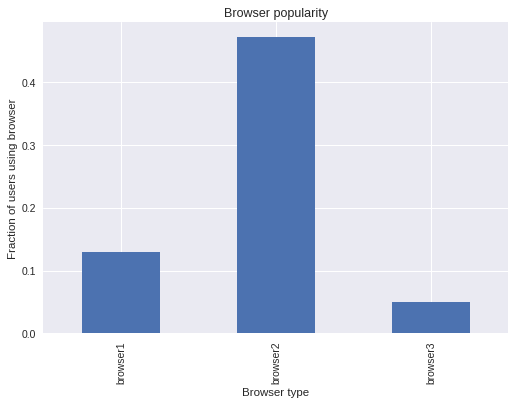

In [ ]:
ax = df1.plot.bar()
ax.set(xlabel='Browser type', ylabel='Fraction of users using browser', title='Browser popularity')

###2. What fraction of users use each device?
Repeat the previous analysis for each of the four device types. 


In [ ]:
df[['device_type1', 'device_type2', 'device_type3', 'device_type4']].mean()

device_type1    0.217227
device_type2    0.427419
device_type3    0.592828
device_type4    0.719225
dtype: float64

###3. What fraction of users use more than one browser?
If *which* browser someone uses doesn't tell us much, it is possible that we can get information from their browsing behaviour, including how many different browsers they use. 


Let's first add a new column called ``multihoming`` which is 1 if a user uses multiple browsers and 0 otherwise. 

In [ ]:
df['multihoming'] = (df.browser1 + df.browser2 + df.browser3 > 1)

Now we can summarise as usual. 

In [ ]:
df.multihoming.mean()

###4. What is the distribution of open-rates?
We already saw that the ``describe`` function can give us much of this information. 
Let's plot a histogram of ``p_open``, using the ``cumulative`` and ``bins`` argument to achieve the desired output.  

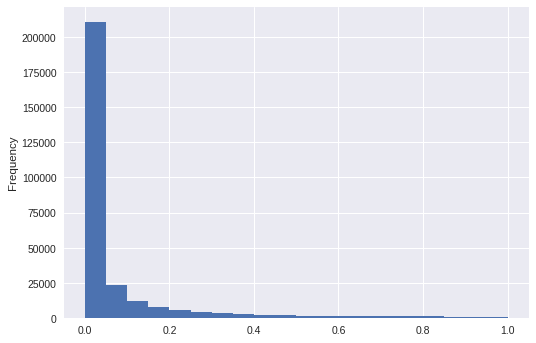

In [ ]:
df.p_open.plot.hist(cumulative=False, bins=20) ; 

###5. What is the email open rate by browser?
Let's visualize this with a box plot. Our browser data is currently spread across three columns, so we use the ``melt`` function to unpivot it from a wide to a long format.

 Make sure you understand this code block by running it on the first 10 rows of ``df`` and inspecting the output. 

In [ ]:
df5 = df.loc[:, ['browser1', 'browser2', 'browser3', 'p_open'] ]

df5_long = pd.melt(df5, id_vars=['p_open'],
        value_vars=['browser1', 'browser2', 'browser3'], 
        var_name = 'browser',
        value_name='using-browser' )

Now we are ready to create a box plot. Eliminate the rows where ``using-browser`` is zero, then use the ``by``, ``column`` and ``showfliers`` arguments to obtain the desired outcome: 

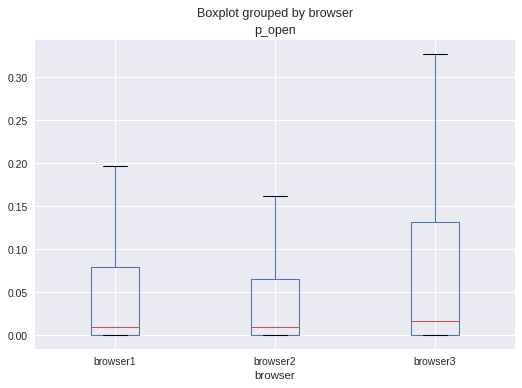

In [ ]:
df5_long.loc[df5_long['using-browser'] > 0.5].boxplot(
    by='browser', column='p_open', showfliers=False)

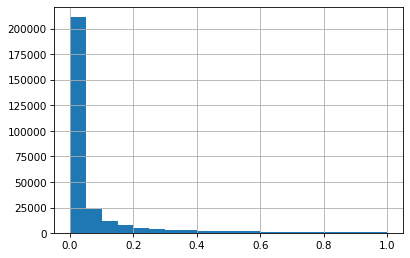

In [ ]:
df['p_open'].hist(cumulative=False,  bins=20)

# Continue exploring on your own

We have only explored the dataset in a very limited fashion. There are any number of more interesting questions we can ask to figure out how Cogo should go about emailing users. Here are some example questions to get your started. For each question try to  use pandas to calculate the quantities of interest and create a visualization. 

Some questions: 

1. What is the open rate by device? 
2. Are multi-homing users (those using more than one device) more or less likely to open an email? 
3. On which device are multi-homing users most likely to open an email? 
4. Which users are most active? 
5. What is the relationship between the various activity indicators and open rates? 
6. If you had to avoid one group of users which one would it be? (How would you define groups in the first place?) 
7. If you could only target one group of users which one would it be?

It is up to you to decide what is interesting and/or useful for Cogo among the multiple analyses you will run. 

In [ ]:
#2
df.groupby('multihoming').mean()

,user_id,browser1,browser2,browser3,device_type1,device_type2,device_type3,device_type4,activity_observations,activity_days,activity_recency,activity_locations,activity_ids,age,p_open
multihoming,,,,,,,,,,,,,,,
False,205941.372876,0.078094,0.433241,0.028595,0.214135,0.426448,0.594007,0.697029,50.943019,13.885896,91.135513,1.880222,3.186375,24.006823,0.075774
True,206206.289712,0.784101,0.958714,0.315515,0.256333,0.439705,0.577908,1.000000,149.762180,32.995029,65.111500,2.499361,6.518678,23.956063,0.105070


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


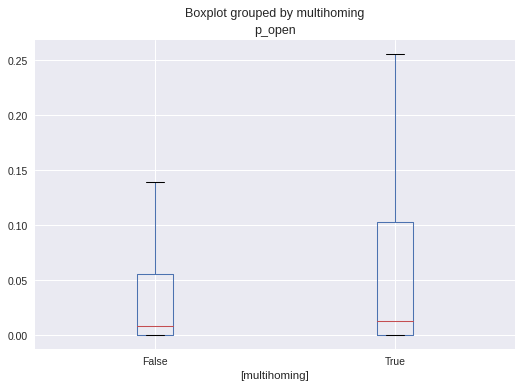

In [ ]:
df.boxplot(column='p_open', by=['multihoming'], showfliers=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


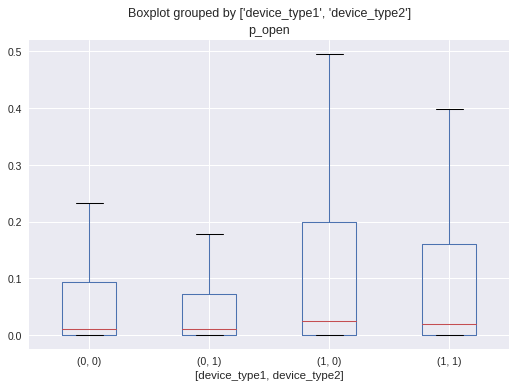

In [ ]:
#3 
df.columns
dfmh = df[df['multihoming']== True]
dfmh.boxplot(column='p_open', by=['device_type1', 'device_type2'], showfliers=False)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


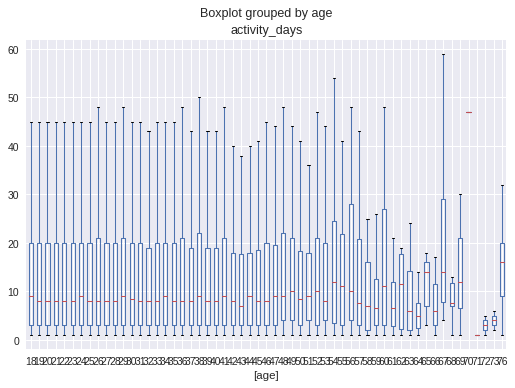

In [ ]:
# 4 
df.boxplot(column='activity_days', by=['age'], showfliers=False) #doesnt show much
# now try  grouping by state/gender/multihoming etc

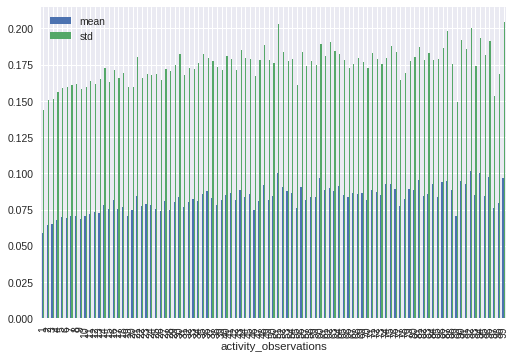

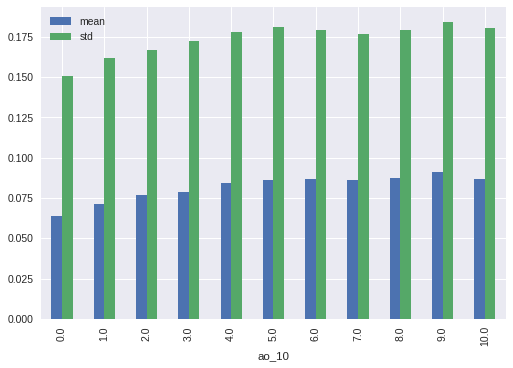

In [ ]:
# 5
# start with activity locations
#df[df.activity_observations<100].plot.scatter(x='activity_observations', y='p_open')
df[df.activity_observations<100].groupby('activity_observations')['p_open'].agg([np.mean, np.std]).plot.bar()
# can lump ranges together
df['ao_10'] = round(df['activity_observations']/10)
df[df.activity_observations<100].groupby('ao_10')['p_open'].agg([np.mean, np.std]).plot.bar()


Q6 and Q7: This depends on what you found in your analyses.   If you are worried about emails being flagged as spam these may be good people to target it may be a good strategy to target people with a high open rate.  

However, it's a strategic question and depends on the company's goals. For example, if the goal is to grow their consumer base the best strategy may be to target a group which currently has low engagement but has a lot in common with some other very engaged group. 

One pottentially interesting finding that requires further investigation is below: there appears to very clearly be 'high' and 'low' open rate states. Why? It's not immediately clear, perhaps customers are different in some fundamental way, perhaps legislation is different etc. We would have to analyse this further to fully understand it, and understanding it is probably crucial to determining our strategy for different objectives. 

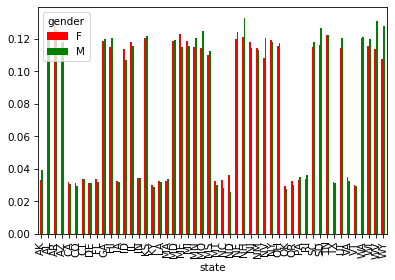

In [ ]:
import matplotlib.pyplot as plt
df.groupby(['state','gender'])['p_open'].mean().unstack().plot.bar(color=['r', 'g'] )
#plt.savefig("abc.png", dpi=600)
#from google.colab import files
#files.download("abc.png") 

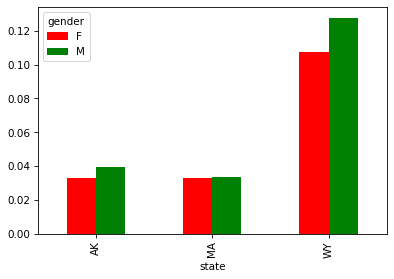

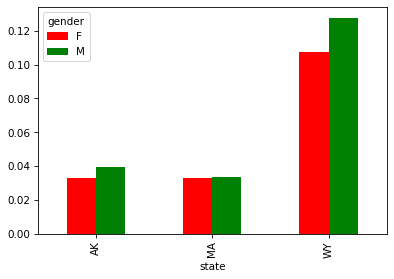

In [ ]:
df[(df.state == 'WY') | (df.state == 'MA') | (df.state =='AK')].groupby(['state','gender'])['p_open'].mean().unstack().plot.bar(color=['r', 'g'])
df[df.state.isin(['WY', 'MA', 'AK'])].groupby(['state','gender'])['p_open'].mean().unstack().plot.bar(color=['r', 'g'])

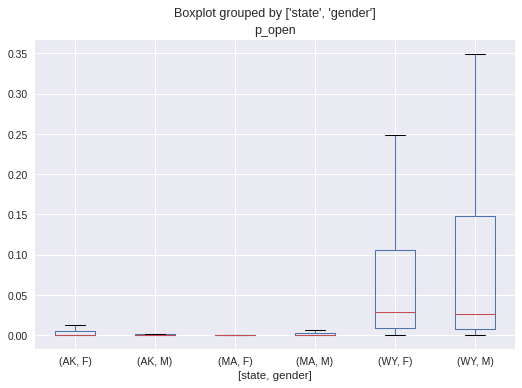

In [ ]:
df3 = df[(df.state == 'WY') | (df.state == 'MA') | (df.state =='AK')]
df3.boxplot(column='p_open', by=['state', 'gender'], showfliers=False)
#showfliers is matplotlib argument, should outliers be shown

Notice the large difference between the mean and the median, we can conclude that 'low' states have a lot of high outliers and the rest of the population is at basically zero. 'High' states still have high outliers, but the bottom of the distribution is significantly higher. 